In [2]:
import DoubleDIP
import matplotlib.pyplot as plt

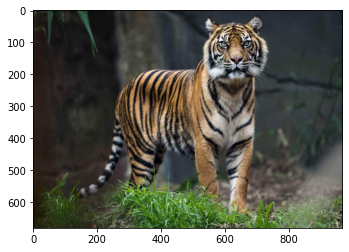

In [3]:
img = plt.imread("images/tiger.jpg")
plt.imshow(img)

In [9]:
!pip install line_profiler
%load_ext line_profiler

     |████████████████████████████████| 673 kB 48.6 MB/s eta 0:00:01


In [15]:
%lprun -f DoubleDIP.DoubleDipSegmentation.fit DoubleDIP.segment(img, iters=50)

100%|██████████| 50/50 [00:07<00:00,  6.38it/s, 0.36681118607521057]


Timer unit: 1e-09 s

Total time: 7.8357 s
File: /home/ubuntu/double-dip/DoubleDIP.py
Function: fit at line 437

Line #      Hits         Time  Per Hit   % Time  Line Contents
   437                                               def fit(self, iters=1000, z_std=0.02, show_progress=True):
   438         1       3096.0   3096.0      0.0          self._reset_metrics()
   439         1       1268.0   1268.0      0.0          iterator = range(iters)
   440         1        154.0    154.0      0.0          if show_progress:
   441         1    1148160.0 1148160.0      0.0              iterator = tqdm.tqdm(iterator, total=iters)
   442                                                       
   443         1    1778445.0 1778445.0      0.0          optim = torch.optim.Adam(self.net.parameters(), lr=1e-3)
   444         1        790.0    790.0      0.0          inputs = (self.za, self.zb, self.zc)
   445                                                   
   446        50   26696777.0 533935.5     

In [4]:
segmentation = DoubleDIP.segment(img)

# profile segment() method
%timeit DoubleDIP.segment(img)

  0%|          | 0/1000 [00:00<?, ?it/s]

100%|██████████| 1000/1000 [02:37<00:00,  6.35it/s, 0.045915961265563965]


array([[[[8.1046343e-01, 8.1081837e-01, 8.1152666e-01, ...,
          7.5690812e-01, 7.5738078e-01, 7.5761700e-01],
         [8.1028193e-01, 8.1072962e-01, 8.1162250e-01, ...,
          7.5723988e-01, 7.5741249e-01, 7.5749892e-01],
         [8.0991846e-01, 8.1055194e-01, 8.1181413e-01, ...,
          7.5790256e-01, 7.5747603e-01, 7.5726259e-01],
         ...,
         [7.9341632e-01, 7.9426736e-01, 7.9596174e-01, ...,
          8.8226784e-07, 9.5266620e-07, 9.8994644e-07],
         [7.9530555e-01, 7.9565305e-01, 7.9634678e-01, ...,
          9.2093478e-07, 9.4483244e-07, 9.5701523e-07],
         [7.9624534e-01, 7.9634333e-01, 7.9653907e-01, ...,
          9.4090041e-07, 9.4094077e-07, 9.4096151e-07]]],


       [[[7.6098120e-01, 7.6194298e-01, 7.6385838e-01, ...,
          1.0763356e-06, 1.1061169e-06, 1.1213134e-06],
         [7.6178783e-01, 7.6249969e-01, 7.6391888e-01, ...,
          1.1131657e-06, 1.1176706e-06, 1.1199315e-06],
         [7.6339573e-01, 7.6361048e-01, 7.6403999e-01,

In [7]:
!nvidia-smi

Mon Jun 19 21:31:29 2023       
+-----------------------------------------------------------------------------+
| NVIDIA-SMI 525.85.12    Driver Version: 525.85.12    CUDA Version: 12.0     |
|-------------------------------+----------------------+----------------------+
| GPU  Name        Persistence-M| Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp  Perf  Pwr:Usage/Cap|         Memory-Usage | GPU-Util  Compute M. |
|                               |                      |               MIG M. |
|===============================+======================+======================|
|   0  NVIDIA A10          On   | 00000000:06:00.0 Off |                    0 |
|  0%   66C    P0    74W / 150W |    330MiB / 23028MiB |      0%      Default |
|                               |                      |                  N/A |
+-------------------------------+----------------------+----------------------+
                                                                               
+-------

In [6]:
!kill -9 76463

/usr/bin/sh: 1: kill: No such process

